#Part a

In [326]:
#Load exdata1 Data use np.loadtxt

import numpy as np
data = np.loadtxt('ex2data1.txt')
X=data
y=data
'''
data1 = []
data2 = []
value = []
for i in data:
    data1.append(i.item(0))
    data2.append(i.item(1))
    value.append(i.item(2))

X2= np.array([data1,data2])
#print(X)
#y = value
pos = np.where(y == 1)
neg = np.where(y == 0)
print(X[pos, 0]) 
print(data[pos, 1])
'''

'\ndata1 = []\ndata2 = []\nvalue = []\nfor i in data:\n    data1.append(i.item(0))\n    data2.append(i.item(1))\n    value.append(i.item(2))\n\nX2= np.array([data1,data2])\n#print(X)\n#y = value\npos = np.where(y == 1)\nneg = np.where(y == 0)\nprint(X[pos, 0]) \nprint(data[pos, 1])\n'

#Visualize the Data

Your plot should look like the figure below, exact markers and colors are not important as long as labels and legend are correct

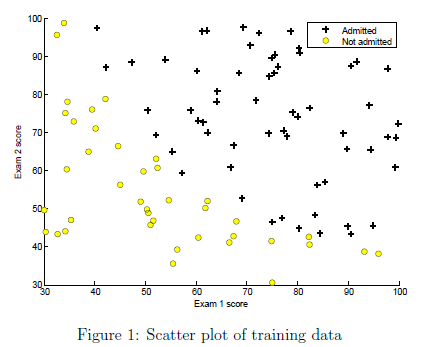

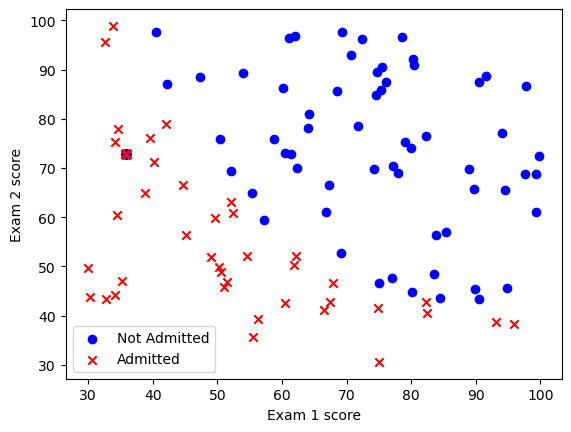

In [327]:
#Import relevant library to plot the data
from pylab import scatter, show, legend, xlabel, ylabel
pos = np.where(y == 1)
neg = np.where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
#print(X[pos, 0], X[pos, 1])
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()

#Sigmoid Function

Logistic Regression Hypothesis and Sigmoid function is given below and implementation is given in MATLAB, write the function for sigmoid below

\begin{align}
\ h_{\theta}(x) = g(\theta^Tx),.
\end{align}



\begin{align}
        g(z) = \frac{1}{1+e^{-z}}
\end{align}

In [328]:
#WRITE FUNCTION HERE

def sigmoid(X):
    '''Compute the sigmoid function '''
    return 1/(1+np.exp(X))



In [329]:
#Provide input values to the sigmoid function below and run to check the function
sigmoid(0)

0.5

#Cost Function and Gradient

The logistic regression cost function and gradient is given below.

\begin{align}
        J(\theta) =\frac{1}{m}\sum_{i=1}^m[-y^{(i)}\log(h_{\theta}(x^{(i)}))- (1 -y^{(i)})\log(1- h_{\theta}(x^{(i)}))
\end{align}

\begin{align}
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m( h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}

In [330]:
#WRITE THE COST AND GRADIENT FUNCTION
from sympy import *
def costFunction(theta,X,y): #computes cost given predicted and actual values
    m = len(y)

    J = 0

    Hypothesis = sigmoid(X.dot(theta))
    #print(Hypothesis)
    B=np.log(Hypothesis)
    #print(B)
    C=np.log(1-Hypothesis)
    D=np.multiply(B,y)
    E=np.multiply((C),(1-y))
    J=(1/m)*(-np.sum(D)-np.sum(E))
    

    return J

def compute_grad(theta, X, y):
    grad = zeros(len(theta))
    m = len(y)

    J = 0

    Hypothesis = sigmoid(X.dot(theta))

    B=np.log(Hypothesis)
    C=np.log(1-Hypothesis)
    D=np.mutlipy(B,y)
    E=np.multiply((C),(1-y))
    J=(1/m)*(-np.sum(D)-np.sum(E))
    for i in range(m-1):
        grad[i]=(1/m)*(sum((Hypothesis-y)* X[i]))



In [331]:
X.shape

(100, 3)

Initialize the data

In [332]:
#Setup the data matrix appropriately
m,n = np.shape(X)

#Add intercept term to X
#HINT FIRST CREATE A Column Matrix of Ones and then use hstack to add it to X
one = np.ones((m,1))
#print(one)
X = np.hstack((one,X)) 
#print(X)

#Initialize the fitting parameters
initial_theta = np.zeros((3 ,1))


In [333]:
A = np.reshape(initial_theta,(len(initial_theta),1))
A.shape

(3, 1)

Compute the gradient

In [334]:
#Verify with MATLAB's test values
cost = costFunction(initial_theta, X, y)
print('Cost at initial theta (zeros): %f\n', cost)

ValueError: shapes (100,4) and (3,1) not aligned: 4 (dim 1) != 3 (dim 0)

In [ ]:
grad = compute_grad(initial_theta, X, y)
print(grad)

AttributeError: module 'numpy' has no attribute 'mutlipy'

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=initial_theta, fprime=compute_grad, args=(X, y))
theta = result[0]
costFunction(theta, X, y)


0.20349770159878078

In [ ]:
def predict(theta, X):
    


theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
